Source for dowdload images: https://dr12.sdss.org/fields/name?name=M42

For command and more tutorials: https://python4astronomers.github.io/astropy/fits.html#reading-fits-files-and-accessing-data

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits

In [5]:
M42 = fits.open('frame-u-006073-4-0063.fits')

In [6]:
M42

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x00000253F1679548>, <astropy.io.fits.hdu.image.ImageHDU object at 0x00000253F166DB08>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000253F166AD08>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000253F1E4C188>]

In [7]:
M42.info()

Filename: frame-u-006073-4-0063.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


In [8]:
data = M42[0].data

In [9]:
type(data)

numpy.ndarray

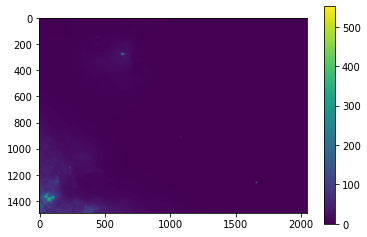

In [10]:
plt.imshow(data)
plt.colorbar()

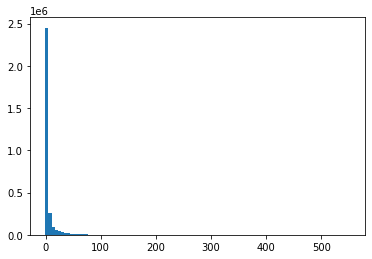

In [11]:
histogram = plt.hist(data.flat, bins=100)

[Text(1, 4000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

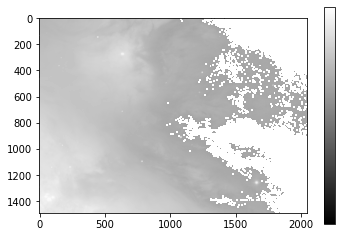

In [12]:
from matplotlib.colors import LogNorm


plt.imshow(data, cmap='gray', norm=LogNorm())
cbar = plt.colorbar(ticks=[4.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

In [13]:
from astropy.visualization import make_lupton_rgb

In [14]:
M42u = fits.open('frame-u-006073-4-0063.fits')
M42i = fits.open('frame-i-006073-4-0063.fits')
M42g = fits.open('frame-g-006073-4-0063.fits')

g = M42g[0].data
i = M42i[0].data
u = M42u[0].data

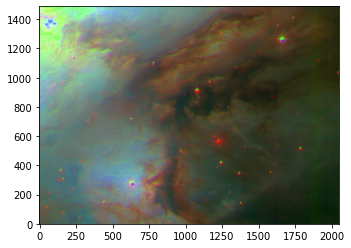

In [15]:
rgb_default = make_lupton_rgb(i,g, u,stretch=1.5,Q=10)



plt.imshow(rgb_default, origin='lower')
plt.savefig("rgbM42.jpg")

## Download automatically

In [16]:
from astropy.utils.data import download_file

image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True)

In [17]:
hh = fits.open(image_file)
hh.info()

Filename: C:\Users\HONG NGHUYEN\.astropy\cache\download\url\ff6e0b93871033c68022ca026a956d87\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [18]:
image_data = hh[0].data

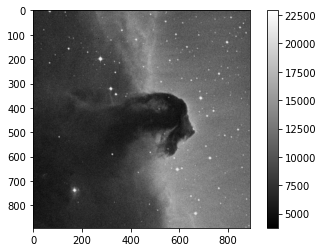

In [19]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

In [20]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046


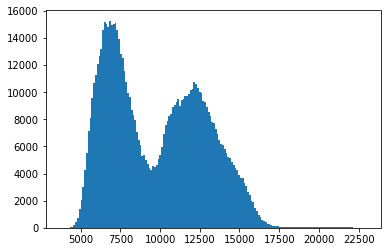

In [21]:
histogram = plt.hist(image_data.flatten(), bins='auto')

[Text(1, 5000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

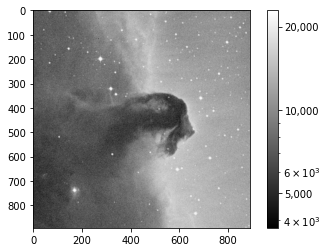

In [22]:
plt.imshow(image_data, cmap='gray', norm=LogNorm())

# The tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])